### connect react to the supabase and CRUD

For the shake of learning, we will build a Task manager 

In [ ]:
npm install @supabase/supabase-js

supabase-client.js

In [ ]:
import {createClient} from "@supabase/supabase-js"
require('dotenv').config();


const supabaseUrl = 'https://wtjjtwictrguauiknlmt.supabase.co'
const supabaseKey = process.env.SUPABASE_KEY
export const supabase = createClient(supabaseUrl, supabaseKey)

In the taskmanagement.jsx

In [ ]:

import { useState } from "react";
import { supabase } from "../supabase-client";

function taskmanagement() {
    const [newTask, setNewTask] = useState({ task: "", description: "" });
    const handleSubmit = async (e) => {
        e.preventDefault();
        const { data, error } = await supabase.from("tasks").insert([newTask]);
        # from represent table name which have feature like insert, select, update, delete
        # here [newTask] is numbers of objects insering in bulk.
        # .multiple(True) is used to fetch multiple objects at once     
        const {data, error} = await supabase.from("tasks").insert(newTask).single();
        # newTask is a single object, since we are inserting one object at a time
        # .single() is used when we are inserting a single object
        if (error){
        console.log("Error inserting data:", error);
        return;
        }
        setNewTask({title: "",description:""})
        # resetting the title and description to null after submit
  };  

  return (
      <form onSubmit={handleSubmit} style={{ marginBottom: "1rem" }}>
        <input
          type="text"
          placeholder="Task Title"
          onChange={(e) =>
            setNewTask((prev) => ({ ...prev, task: e.target.value }))
          }
          # FIX 4: The value prop must match the state property "task".
          value={newTask.task}
          style={{ width: "100%", marginBottom: "0.5rem", padding: "0.5rem" }}
        />
        <textarea
          placeholder="Task Description"
          onChange={(e) =>
            setNewTask((prev) => ({ ...prev, description: e.target.value }))
          }
          # FIX 5: Textarea also needs a value prop to be a controlled component.
          value={newTask.description}
          style={{ width: "100%", marginBottom: "0.5rem", padding: "0.5rem" }}
        />
        # The button's type is "submit", so it automatically triggers the form's onSubmit event 
        <button type="submit" style={{ padding: "0.5rem 1rem" }}>
          Add Task
        </button>
      </form>
  )
}

Similarly, we want to fetch task as well right. let's do it

In [ ]:


function Taskmanagement() {
  const [tasks, setTasks] = useState([]);
  const fetchTasks = async () => {
    const { data, error } = await supabase
        .from("tasks")
        .select("*")
        .order("created_at", { ascending: true });
    
    if (error) {
      console.error("Error fetching data:", error);
      return;
    } else {
      console.log("Fetched tasks:", data);
    }
    setTasks(data);
  };
  useEffect(() => {
    fetchTasks();
    console.log(tasks);
  }, []);

  return(
      
      <ul>
        {tasks.map((task,key) => (
        <li key={key}>
          <div>
            <h3>{task.task}</h3>
            <p>{task.description}</p>
            <div>
              <button>Edit</button>
              <button>Delete</button>
            </div>
          </div>
        </li>
        ))}
      </ul>

  )
  
}

Now,we want to delete the task

In [ ]:
function Taskmanagement(){

    const deleteTask = async (id) => {
        const { data, error } = await supabase
            .from("tasks")
            .delete()
            .eq("id", id);
            // equivalance condition
        if (error) {
            console.error("Error deleting task:", error);
            return;
        } else {
            console.log("Task deleted successfully:", data);
            // Refresh the task list after deletion
            fetchTasks();
        }
    };

    # from above
    <button onClick={() => deleteTask(task.id)}>Delete</button>

}

Now, we need to update it too

In [ ]:

function Taskmanagement() {
    const [newDescription, setNewDescription] = useState(""); 

    const updateTask = async (id) => { 
        const { data, error } = await supabase
            .from("tasks")
            .update({ description: newDescription })
            .eq("id", id)
        
        if (error) {
            console.error("Error updating task:", error);
            return;
        } else {
            console.log("Task updated successfully:", data);
            // Refresh the task list after update
            fetchTasks();
        }
  };


    return(
        <textarea
            placeholder="Update Task Title"
            onChange={(e) => {setNewDescription(e.target.value )}}/>
        <button 
            style={{ padding: "0.5rem 1rem", marginRight: "0.5rem" }}
            onClick={() => updateTask(task.id, { task: newDescription })}
            >
            Edit
        </button>
    )
}

<br><br><br><br><br>
We, need to import the Taskmanagement.jsx in the app.jsx

In [ ]:
import TaskManagement from "./components/taskmanagement";
import Auth from "./components/auth";
function App() {
  return (
    <div className="App">
      <Auth />
      <TaskManagement />
    </div>
  );
}

export default App;

But, There is auth too. Yes, now we will learn about the authentication too

In [ ]:
import { useState, FormEvent, ChangeEvent } from "react";
import { supabase } from "../supabase-client";

function Auth() {
  const [isSignUp, setIsSignUp] = useState(false);
  const [email, setEmail] = useState("");
  const [password, setPassword] = useState("");   
  const handleSubmit = async (e) => {  
    e.preventDefault();
    if(isSignUp) {
        const {error} = await supabase.auth.signUp({
            email: email,
            password: password,
        });
        if (error) {
            console.error("Error signing up:", error);
            return;
        }
    }else{
        const {error} = await supabase.auth.signInWithPassword({
            email: email,
            password: password,
        });
        if (error) {
            console.error("Error signing in:", error);
            return; 
    }
  }
  return (
      # form for toggle between sign in and sign up
      # form for email and password input
  );
};

It is as simple as that, we don't need to create table or do hard stuff, rather it provide all the feature alone from the supabase.<br><br>
But, we need to handle the session and make browser aware that it is in the session in app.jsx

Before,we move on i want you to make sure whenever you are using useEffect() , don't forget to use [] at the end to make sure it won't run infinitely. very important

In [ ]:
useEffect(()=>{
    fetchSession(;)
    
  },[])

let's handle session in app.jsx

In [ ]:
import "./App.css";
import TaskManagement from "./components/taskmanagement";
import Auth from "./components/auth";
import { useEffect, useState } from "react";
import { supabase } from "./supabase-client";
function App() {
  const [session,setSession] = useState(null);
  const fetchSession = async () =>{
    const currentSession = await supabase.auth.getSession()
    console.log(currentSession)
    setSession(currentSession.data.session)
  }
  useEffect(() => {
    fetchSession();

    const { data: authListener } = supabase.auth.onAuthStateChange(
      (_event, session) => {
        setSession(session);
      }
      );
      # data:authListener is destructuring assignment. authListener is the name of the variable which will hold the value of data property of the object returned by onAuthStateChange method
      # whenever the state of authentication changes, this listener will be triggered
      # onAuthStateChange is a listener function that listens to the auth state change
      # it takes a callback function that has two parameters event and session  

      return () => {
        authListener.subscription.unsubscribe();
      };
      # authListener is an object that has a subscription property
      # cleanup function to unsubscribe the listener when the component unmounts
      # this is important to prevent memory leaks
    }, []);

    const logout = async () => {
      await supabase.auth.signOut();
    };
  return (
    <div className="App">
      {session?(
        <><button onClick={logout}> Log Out</button>
          <TaskManagement session = {session} />
      </>)
      :
      <Auth />}
    </div>
  );
}

export default App;

In above code, we can see that we have passed the session in the Taskmanagement component. this is where **RLS** is used. This is the most important thing we will be learning next

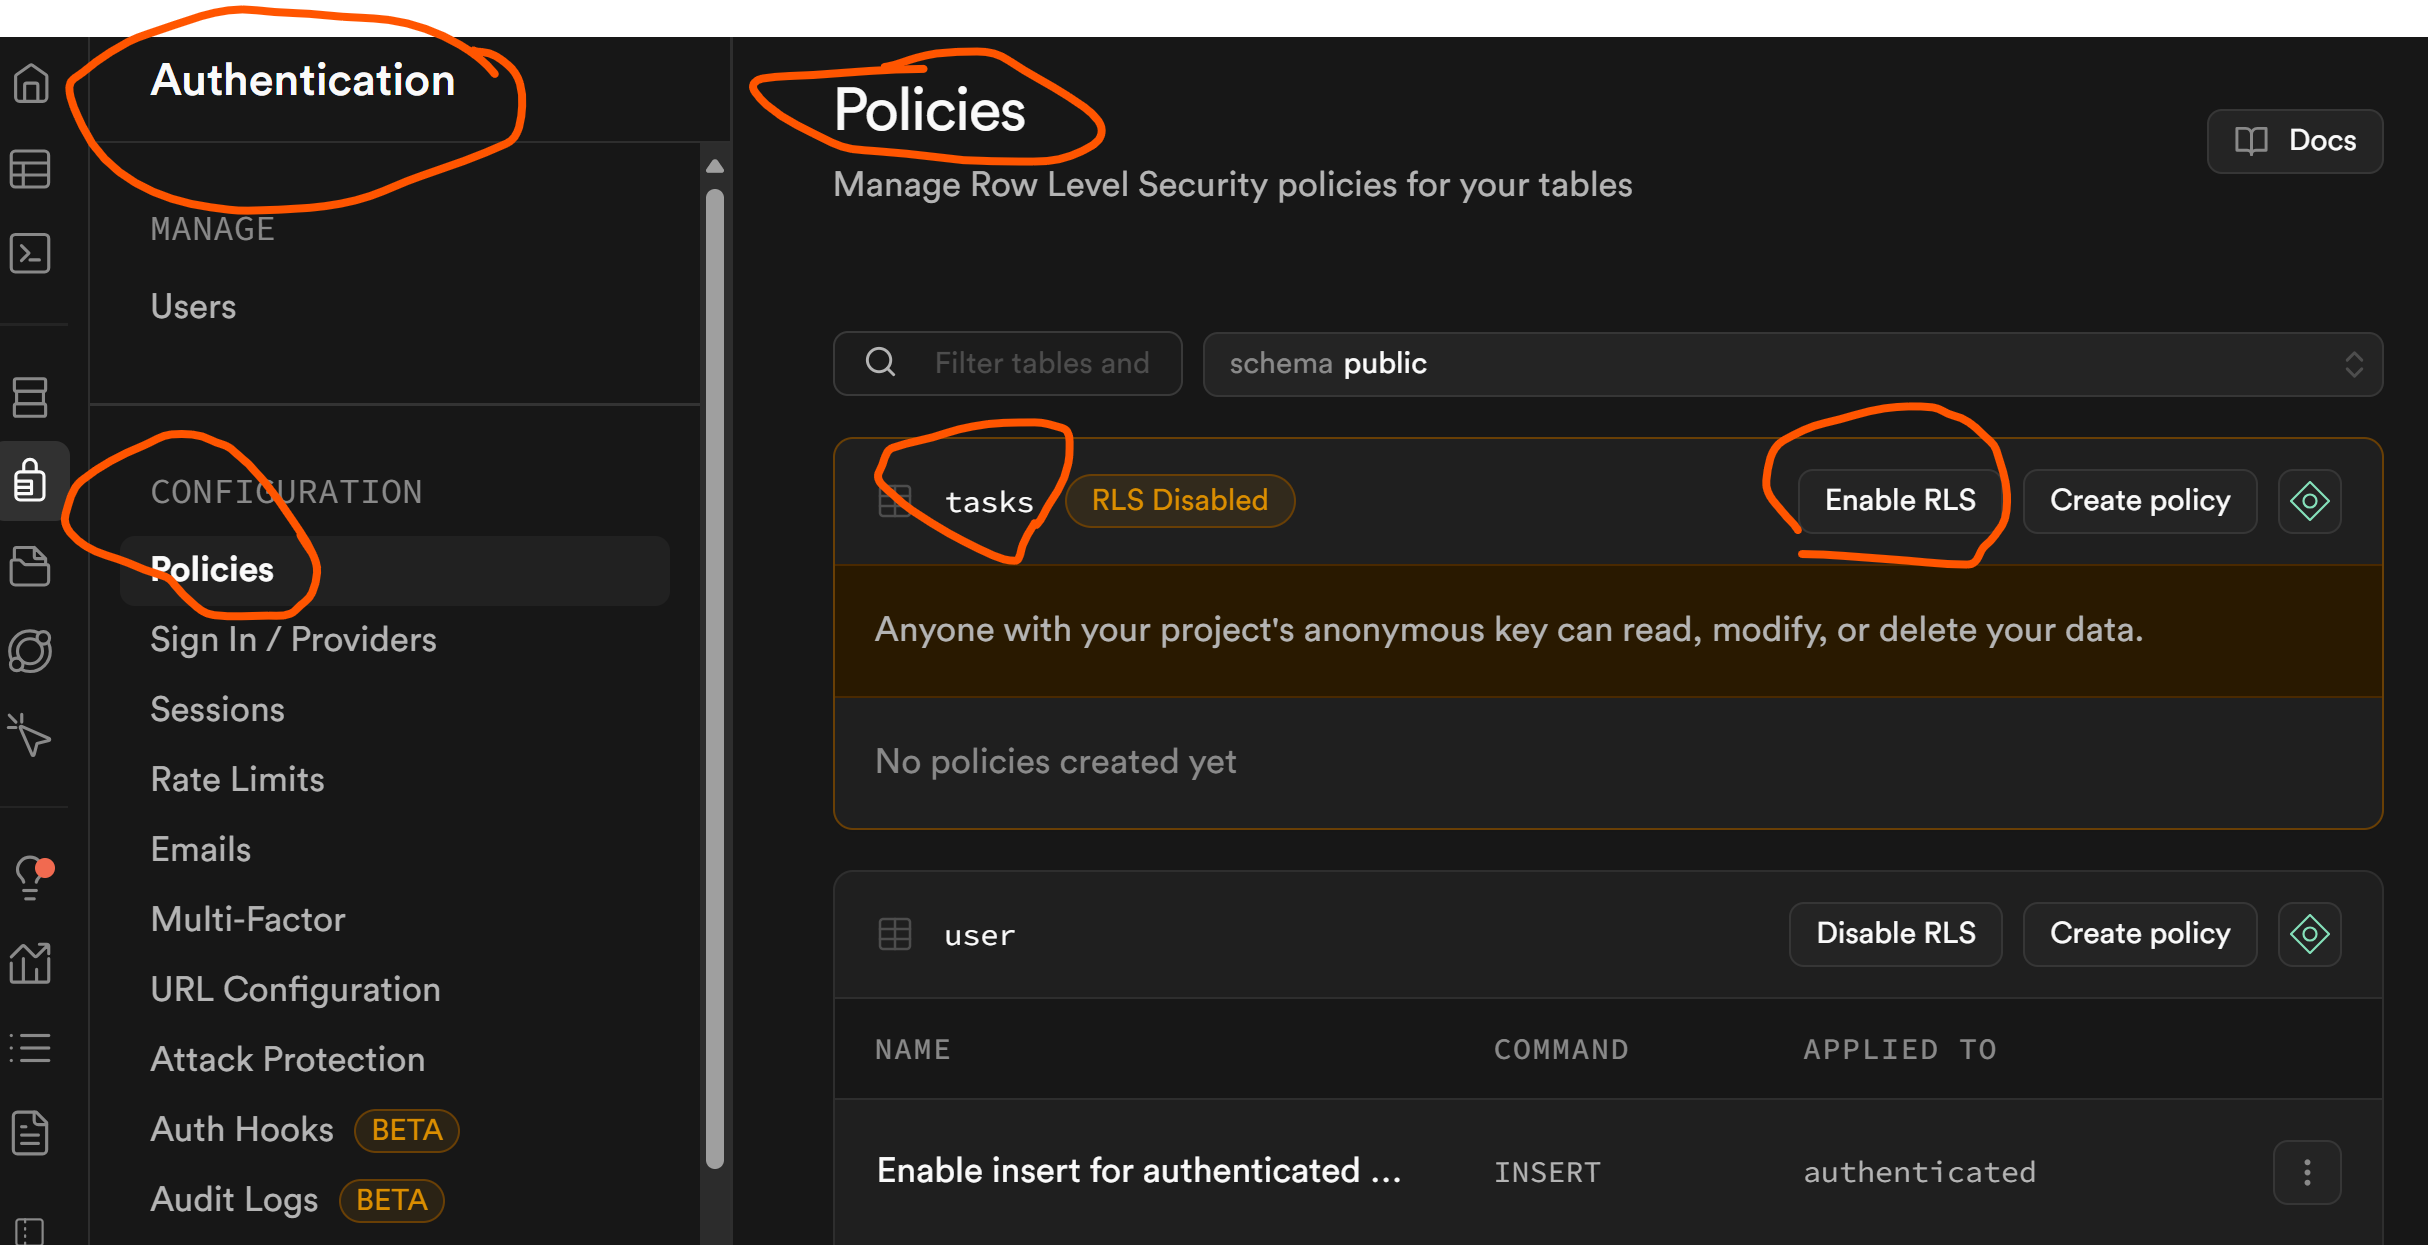

When we enable RLS, it will automatically don't allow anything to do with table without session. We want session for every operation we have built in taskmanagement to work like select, update,delete and edit.<br>
We will create policies for that.<br>You can do according to your preference.for example:-facaebook allow you to read but don't allow you to write comment and all.

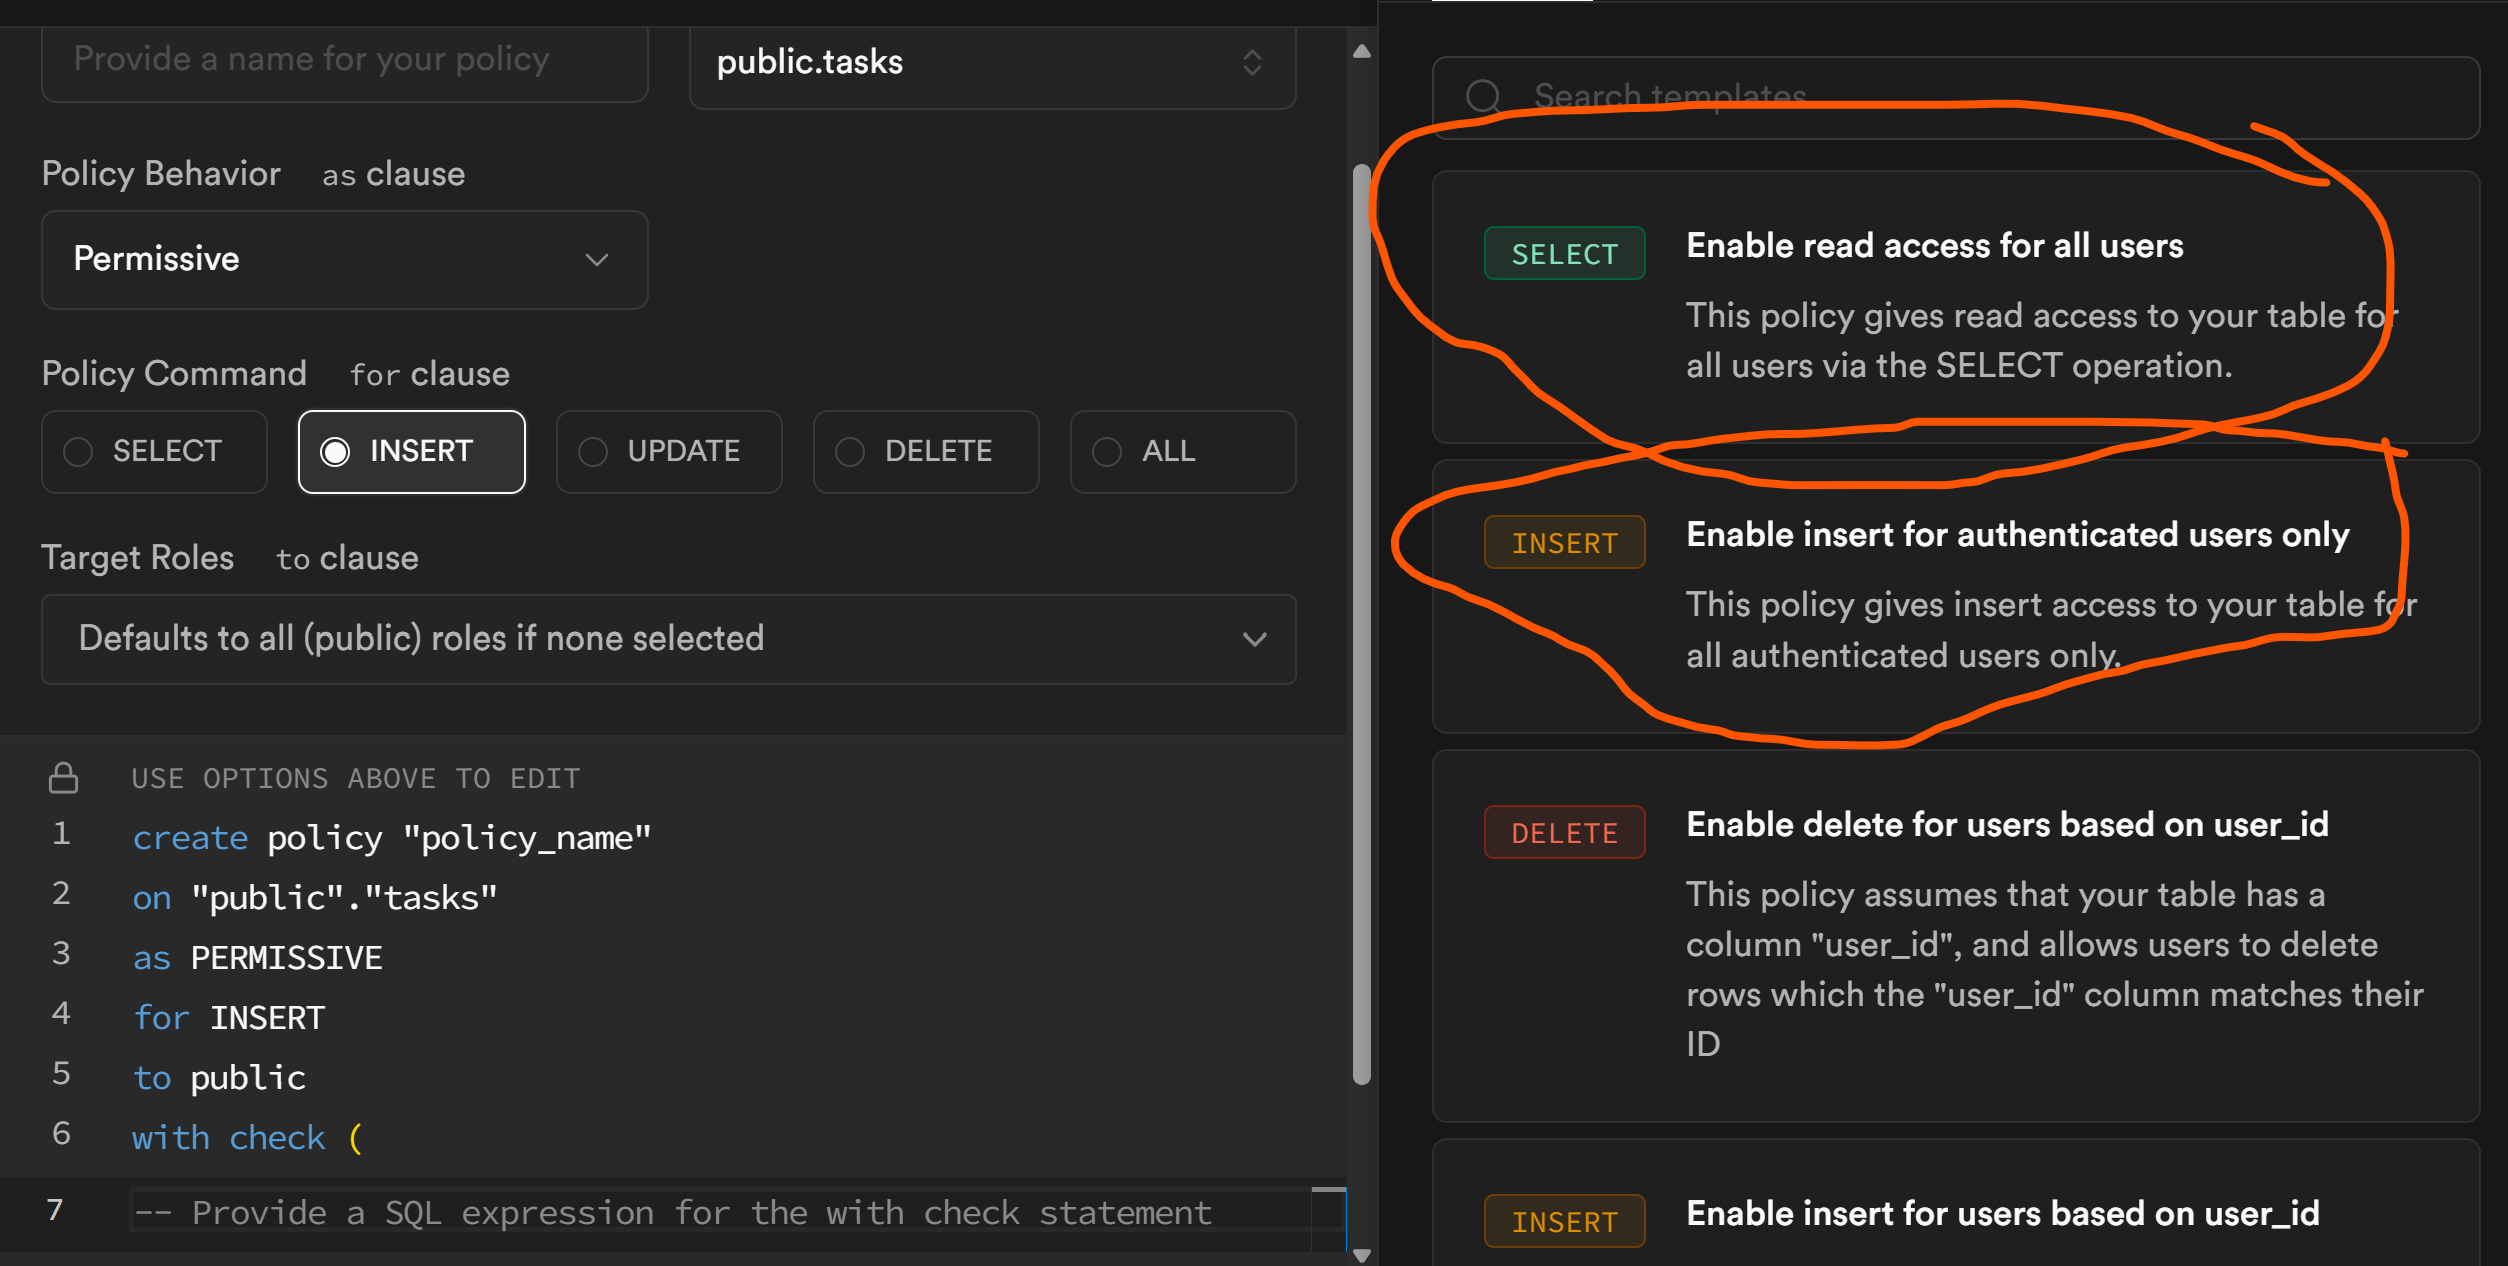

Look insert and select are well define by default. But, for updata and delete, write our own

we want to update the task and all based on user_email which act as a foreign key

In [ ]:
const handleSubmit = async (e) => {
    e.preventDefault();
    const { data, error } = await supabase.from("tasks").insert({...newTask, email: session.user.email}).single();
    setNewTask({ task: "", description: "" });
  };

Look, we are getting email from the session

<br><br><br><br><br><br><br>

### storing image

To store image in storage by supabase, we will create **iamage_url** column in the table of this project itself. <br>
By the way, image system will generate url in supabase which will be used to display image

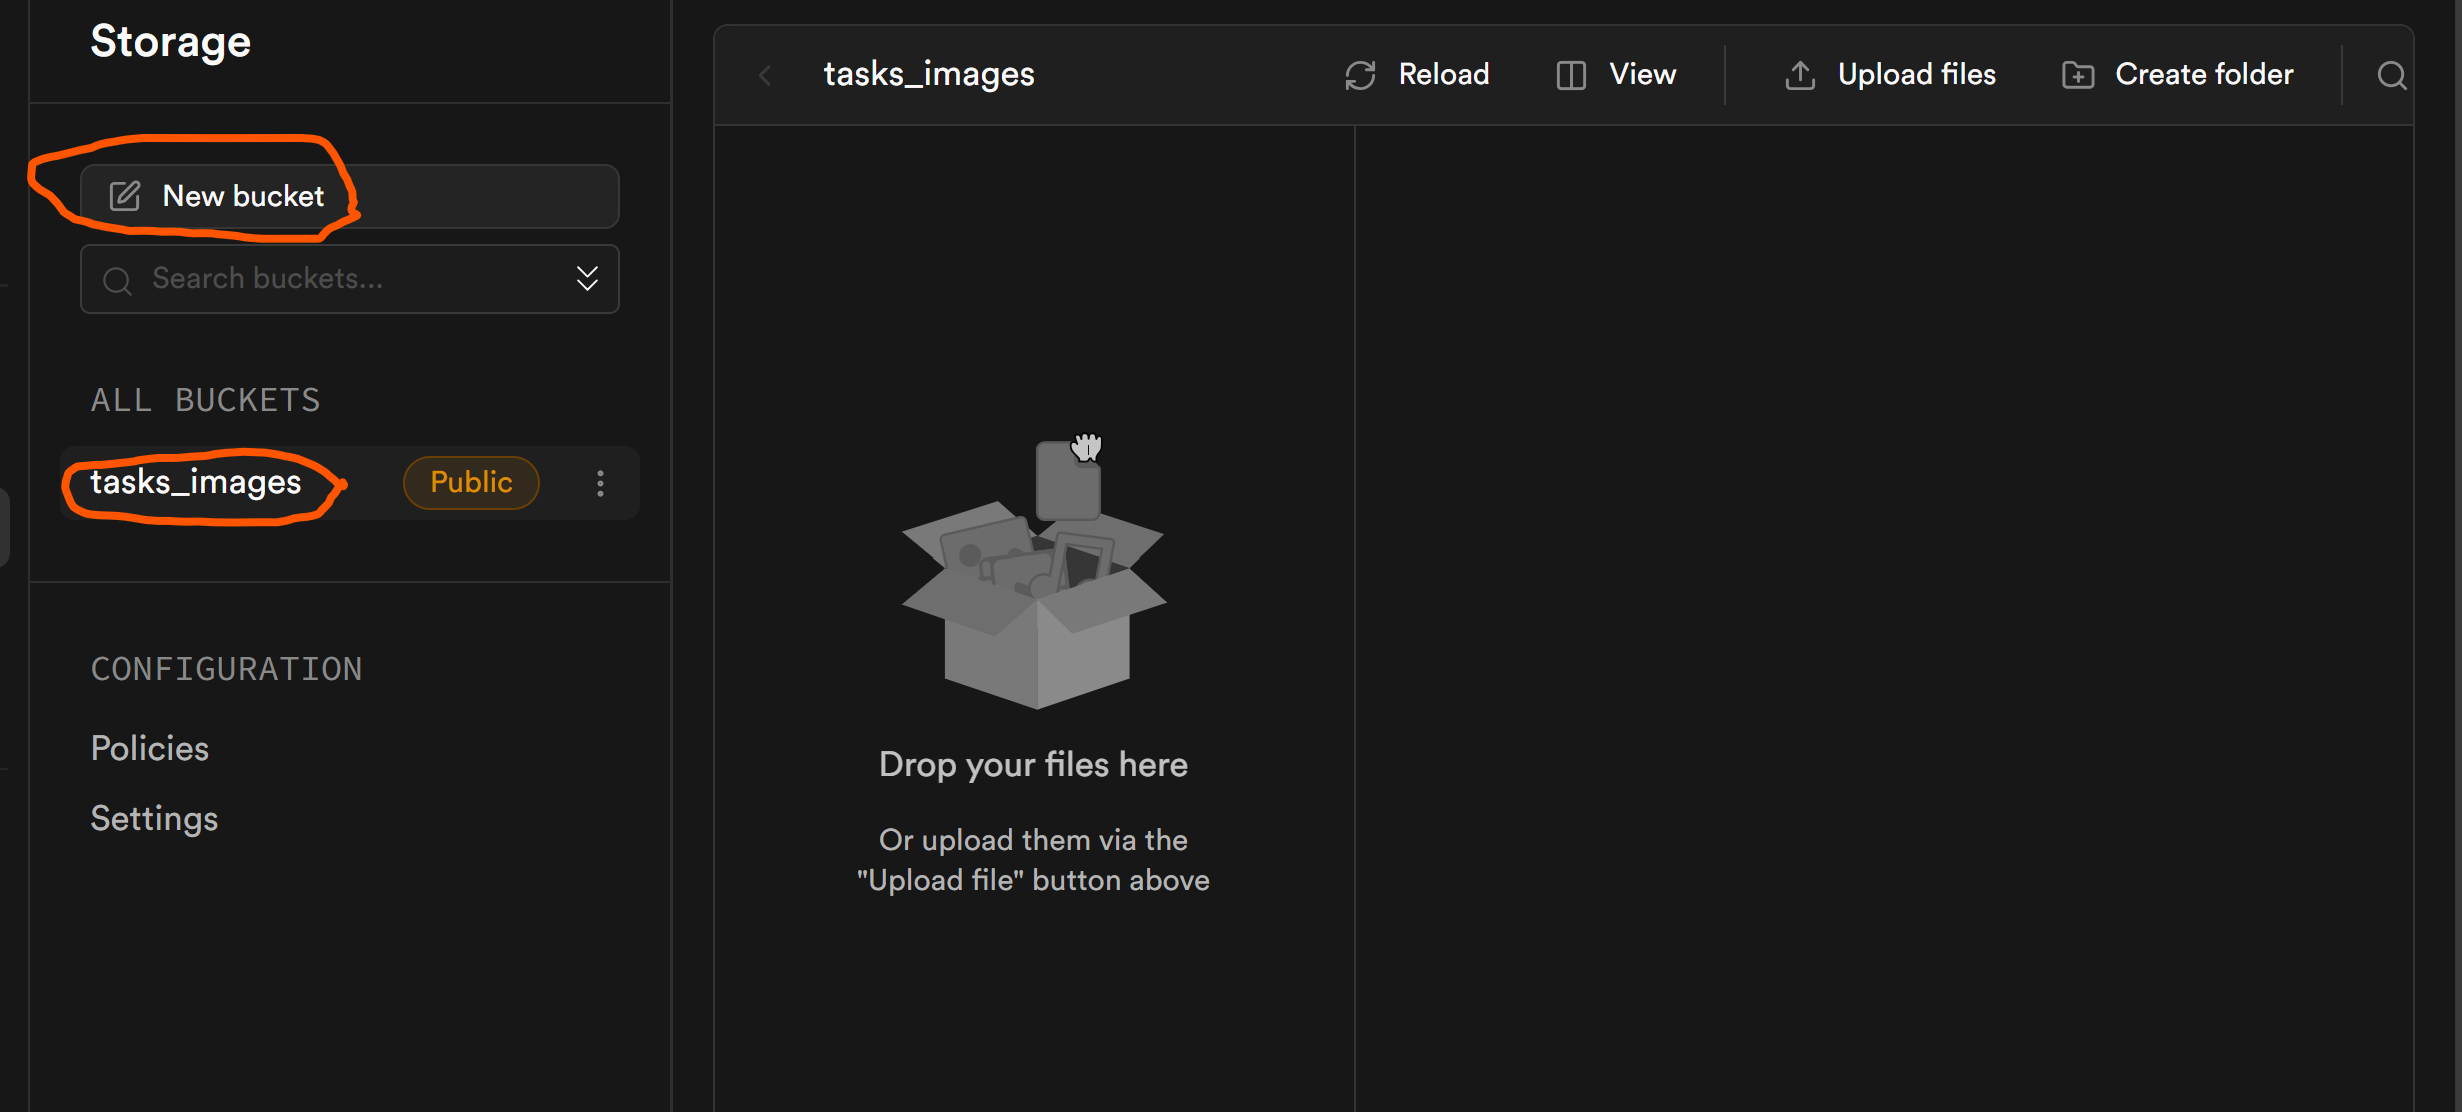

In [ ]:

  const UploadImage = async (file) => {
    const filePath = `${Date.now()}_${file.name}`;
    const { data, error } = await supabase.storage
      .from('tasks_images') // replace with your bucket name
      .upload(filePath, file);
    const imageUrl = supabase
      .storage
      .from('tasks_images')
      .getPublicUrl(filePath);
    return imageUrl.data.publicUrl;
  }
  const handleSubmit = async (e) => {
    e.preventDefault();
    # before we add new task to db, we need to upload image to bucket
     let image_url = null;
     if( taskImage ){
      image_url = UploadImage(taskImage);
     }
    const { data, error } = await supabase.from("tasks").insert({...newTask, email: session.user.email,image_url}).single();

    if (error) {
      console.error("Error inserting data:", error);
      return;
    } else {
      console.log("Task added successfully:", data);
    }
    // Reset the form fields after successful submission
    setNewTask({ task: "", description: "" });
  };



const [taskImage, setTaskImage] = useState(null);
  const handleFileChange = async (event) => {
    if(event.target.files && event.target.files.length > 0) {
      setTaskImage(event.target.files[0]);
    }
  }

return(
  <input type="file" accept="image/*" onChange={handleFileChange}/>

  <img src={task.image_url} alt="Task" style={{maxWidth: '200px'}}/>
)

we might get ***error*** so, we need to **enable policies for bucket from dtorage for insert for authenticated user**